In [132]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Кластеризация

Наша задача - предсказать есть диабет у индивида или нет. В качестве таргета - колонка Diabetes. В нем три различных значения: `0`, `1`, `2`. `0` означает, что наблюдаемой здоров, `1` значит, что есть риск диабета, `2` означает наличие диабета. В качестве признаков будем использовать пол, количество лет в США, доход семьи и некоторые показатели, измеренные медицинскими работниками.  

**Задание 1.** В этой части ДЗ попробуем использовать кластеризацию как инструмент при проведении моделирования в задаче классификации

In [133]:
df = pd.read_csv('C:/Users/maslo/Desktop/karpov_start_ml/2_module/21_lesson/materials/datahw21.csv', index_col='Unnamed: 0')

df.head()

,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,1,0.0,0.84,35.3,20.6,55.2,2.0,2.0
1,1,0.0,1.78,34.7,24.4,61.5,2.0,2.0
2,1,0.0,4.51,33.5,25.6,91.0,2.0,2.0
3,1,0.0,2.52,21.0,14.9,32.2,2.0,0.0
4,2,0.0,5.00,25.2,20.7,30.9,2.0,0.0


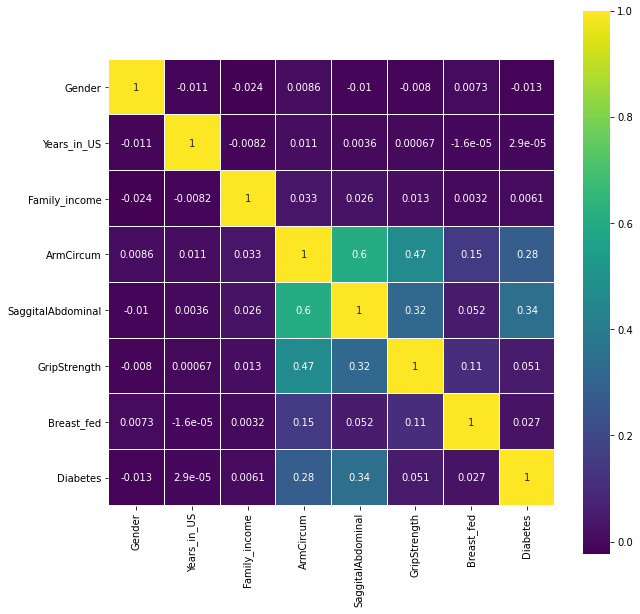

In [134]:
### Посмотрим как устроены данные
### Изобразим корреляционную матрицу

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [135]:
### Разделим выборку на трейн-тест

data = df.drop(['Diabetes'], axis=1)
target = df[['Diabetes']]

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target, 
                                                    test_size=0.25,
                                                    random_state=1)

Для того, чтобы использовать K-means, лучше будет отнормировать данные. 

In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [137]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Обучим K-Means с параметрами `n_clusters` = 3, `tol` = 0.0005. Выбор параметров обусловлен тем, что у нас три возможных значения таргета. Но в целом основной подход подбора количества кластеров - по кривой зависимости внутрикластерного и межкластерного расстояний от количества кластеров.

Установите `random_state` = 1

In [139]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1, tol=0.0005).fit(X_train)

Посчитаем качество на изначальных данных(нормированных). Для этого обучите с дефолтными параметрами `RandomForestClassifier`, `LogisticRegression`, `LinearSVC`. Там, где нужно, установите `random_state` = 1. (1б)

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

rfc_model = RandomForestClassifier(random_state=1).fit(X_train, y_train)
lr_model = LogisticRegression(random_state=1).fit(X_train, y_train)
svc_model = LinearSVC(random_state=1).fit(X_train, y_train)

In [141]:
from sklearn.metrics import classification_report

In [145]:
print(classification_report(y_test, rfc_model.predict(X_test), digits=3))

              precision    recall  f1-score   support

         0.0      0.899     0.987     0.941      2189
         1.0      0.182     0.016     0.029       126
         2.0      0.308     0.086     0.135       139

    accuracy                          0.886      2454
   macro avg      0.463     0.363     0.368      2454
weighted avg      0.828     0.886     0.848      2454



In [146]:
print(classification_report(y_test, lr_model.predict(X_test), digits=3))

              precision    recall  f1-score   support

         0.0      0.901     0.989     0.943      2189
         1.0      0.000     0.000     0.000       126
         2.0      0.275     0.101     0.147       139

    accuracy                          0.888      2454
   macro avg      0.392     0.363     0.363      2454
weighted avg      0.819     0.888     0.849      2454



In [148]:
print(classification_report(y_test, svc_model.predict(X_test), digits=3))

              precision    recall  f1-score   support

         0.0      0.893     1.000     0.943      2189
         1.0      0.000     0.000     0.000       126
         2.0      0.250     0.007     0.014       139

    accuracy                          0.892      2454
   macro avg      0.381     0.336     0.319      2454
weighted avg      0.811     0.892     0.842      2454



In [149]:
print(
    classification_report(y_test, 
                          svc_model.predict(scaler.transform(X_test)), 
                          digits=3, 
                          output_dict=True)['accuracy']
)

0.8920130399348003


Добавьте в признаковое описание номер кластера и посчитайте качество с новым признаком! Стало ли качество хоть сколько-то лучше? (1б)

In [150]:
from sklearn.pipeline import Pipeline

k_means_labels = kmeans.predict(X_train)
X_train = pd.concat([X_train, pd.DataFrame({'kmeans_cluster': k_means_labels}, index=X_train.index)], axis=1)

In [151]:
k_means_labels = kmeans.predict(X_test)
X_test = pd.concat([X_test, pd.DataFrame({'kmeans_cluster': k_means_labels}, index=X_test.index)], axis=1)

In [152]:
rfc_model = RandomForestClassifier(random_state=1).fit(X_train, y_train)
lr_model = LogisticRegression(random_state=1).fit(X_train, y_train)
svc_model = LinearSVC(random_state=1).fit(X_train, y_train)

In [153]:
print(
    classification_report(y_test, 
                          rfc_model.predict(X_test), 
                          digits=3, 
                          output_dict=True)['accuracy']
)

0.8875305623471883


In [155]:
print(
    classification_report(y_test, 
                          lr_model.predict(X_test), 
                          digits=3, 
                          output_dict=True)['accuracy']
)

0.8883455582722086


In [156]:
print(
    classification_report(y_test, 
                          svc_model.predict(X_test), 
                          digits=3, 
                          output_dict=True)['accuracy']
)

0.8920130399348003


Посчитаем расстояния от объектов до центров кластеров. Для этого воспользуемся методом `transform` обученного класса kmeans.

Обучим и посчитаем метрики исключительно на расстояниях до центра. Убедимся, что такой подход имеет право на существование, если данные позволяют, то качество не сильно должно пострадать. А в каких-то случаях может оказаться даже лучше! Таким образом можно снижать размерность данных. (2б)

In [158]:
rfc_model = RandomForestClassifier(random_state=1).fit(kmeans.transform(X_train.drop('kmeans_cluster', axis=1)), y_train)
lr_model = LogisticRegression(random_state=1).fit(kmeans.transform(X_train.drop('kmeans_cluster', axis=1)), y_train)
svc_model = LinearSVC(random_state=1).fit(kmeans.transform(X_train.drop('kmeans_cluster', axis=1)), y_train)

In [160]:
print(
    classification_report(y_test, 
                          rfc_model.predict(kmeans.transform(X_test.drop('kmeans_cluster', axis=1))), 
                          digits=3, 
                          output_dict=True)['accuracy']
)

0.8806030969845151


In [161]:
print(
    classification_report(y_test, 
                          lr_model.predict(kmeans.transform(X_test.drop('kmeans_cluster', axis=1))), 
                          digits=3, 
                          output_dict=True)['accuracy']
)

0.8920130399348003


In [162]:
print(
    classification_report(y_test, 
                          svc_model.predict(kmeans.transform(X_test.drop('kmeans_cluster', axis=1))), 
                          digits=3, 
                          output_dict=True)['accuracy']
)

0.8920130399348003
